In [156]:
!pip install sklearn

In [157]:
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [158]:
import tensorflow as tf
import sklearn
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [159]:
fashion_MNIST_train = pd.read_csv("/content/drive/MyDrive/Fashion MNIST-Data/fashion-mnist_train.csv")
fashion_MNIST_test = pd.read_csv("/content/drive/MyDrive/Fashion MNIST-Data/fashion-mnist_test.csv")

In [160]:
fashion_MNIST_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
fashion_MNIST_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
print(fashion_MNIST_train.shape)
print(fashion_MNIST_test.shape)

(60000, 785)
(10000, 785)


In [163]:
fashion_MNIST_train.keys()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [164]:
fashion_MNIST_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [165]:
fashion_MNIST_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


Visualize with 2*5 grid

In [166]:
classes = {0:'tshirt',1:'trouser',2:'pullover',3:'dress',4:'coat',5:'sandal',6:'shirt',7:'sneaker',8:'bag',9:'ankle boot'}

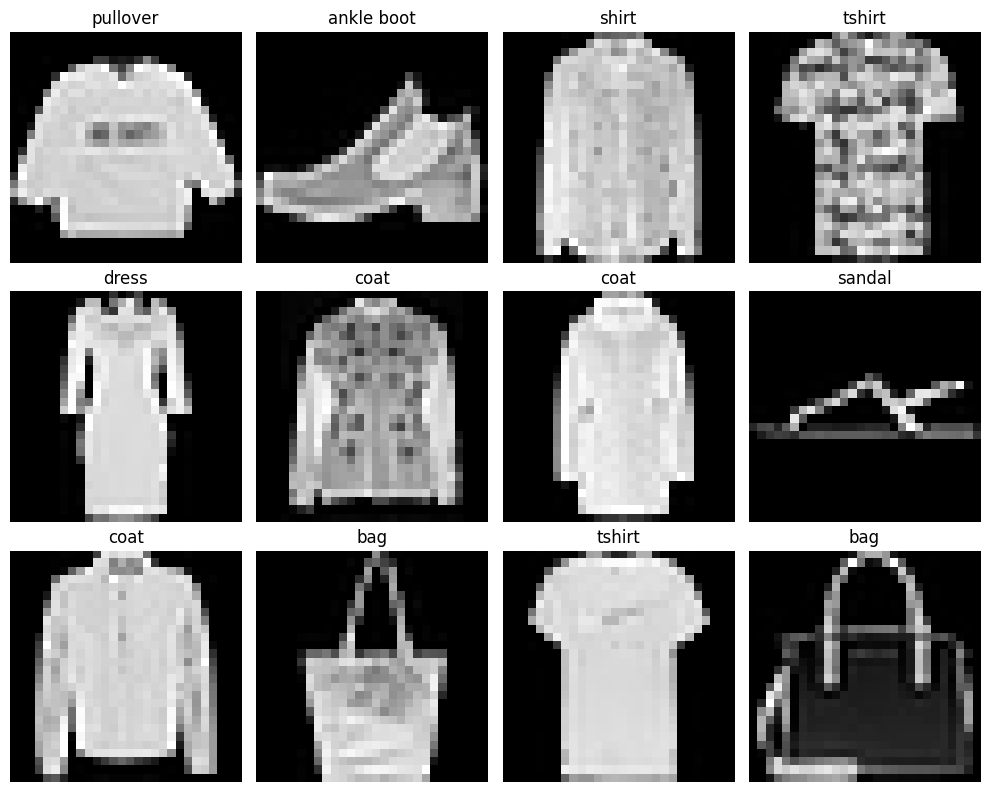

In [167]:
fig, axes = plt.subplots(3, 4, figsize = (10,8))

pixel_values = fashion_MNIST_train.drop('label', axis=1).values
title = fashion_MNIST_train.iloc[:, 0].values

for i, ax in enumerate(axes.flat):

  image = pixel_values[i].reshape(28, 28)
  ax.imshow(image, cmap='gray')
  ax.set_title(classes[title[i]])
  ax.axis('off')

plt.tight_layout()
plt.show()



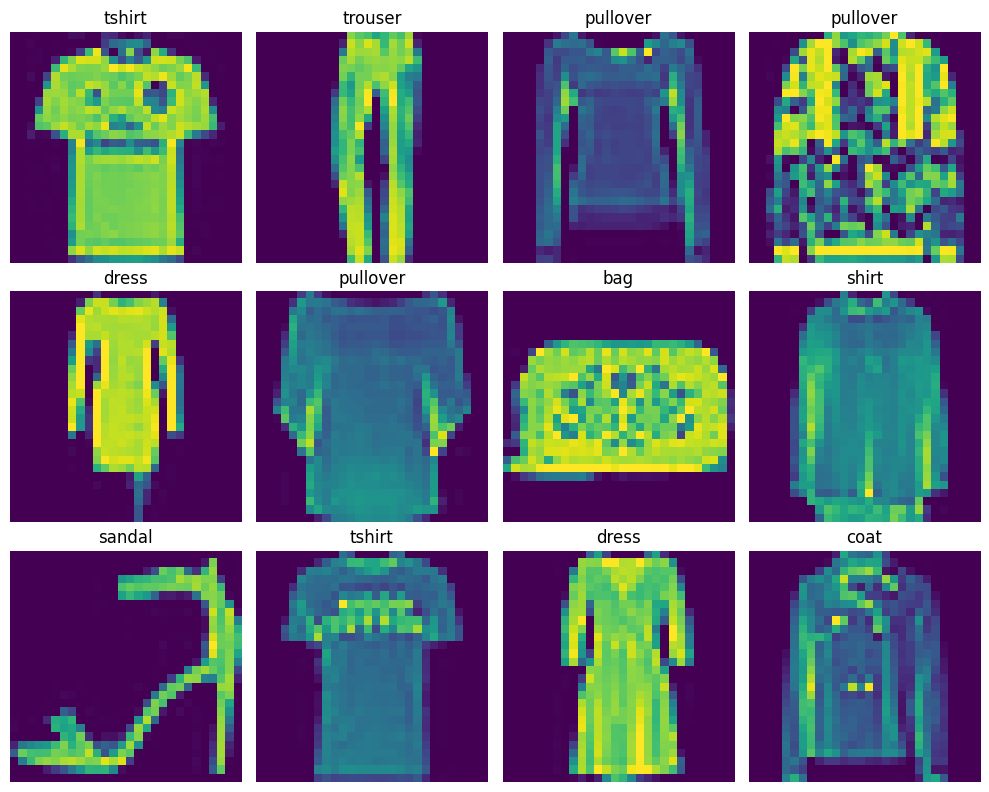

In [168]:
fig, axes = plt.subplots(3, 4, figsize = (10,8))

pixel_values = fashion_MNIST_test.drop('label', axis=1).values
title = fashion_MNIST_test.iloc[:, 0].values

for i, ax in enumerate(axes.flat):

  image = pixel_values[i].reshape(28, 28)
  ax.imshow(image)
  ax.set_title(classes[title[i]])
  ax.axis('off')

plt.tight_layout()
plt.show()

In [169]:
fashion_MNIST_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [170]:
fashion_MNIST_test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [171]:
labelCount = fashion_MNIST_train['label'].value_counts()
print(labelCount)

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64


In [172]:
labelCount = fashion_MNIST_test['label'].value_counts()
print(labelCount)

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64


In [173]:
x_train = fashion_MNIST_train.drop(['label'],axis=1)
y_train = fashion_MNIST_train['label'].copy()
x_test = fashion_MNIST_test.drop(['label'],axis=1)
y_test = fashion_MNIST_test['label'].copy()

In [174]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [176]:
x_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [177]:
x_test.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,14.363500,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,37.911701,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,250.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [178]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)


In [179]:
x_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000056,0.000171,0.000156,0.000622,0.001092,0.001789,0.003597,0.008621,0.022370,0.056819,...,0.135786,0.091375,0.065052,0.070076,0.089470,0.070241,0.033414,0.010797,0.003355,0.000413
std,0.005918,0.007528,0.005409,0.014957,0.018973,0.025375,0.036675,0.055268,0.093777,0.150332,...,0.225668,0.191586,0.164626,0.172416,0.203257,0.177056,0.116137,0.068226,0.036694,0.012505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.227451,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
x_test.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.000200,0.000229,0.000239,0.000416,0.000919,0.001566,0.003347,0.010648,0.022368,0.057454,...,0.135121,0.091555,0.064439,0.070081,0.089647,0.069765,0.034806,0.011296,0.003071,0.000613
std,0.012246,0.011671,0.011442,0.011940,0.020569,0.025372,0.034784,0.068952,0.095734,0.151647,...,0.227908,0.194642,0.165332,0.173100,0.202771,0.176973,0.119857,0.072966,0.036403,0.018075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.216535,0.023810,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(784,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation= 'softmax'))
  return model


In [182]:
model = get_model()

In [183]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [184]:
model.layers

In [185]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=50)
model.evaluate(x_test, y_test)

Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5044 - accuracy: 0.8196
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3769 - accuracy: 0.8641
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3418 - accuracy: 0.8747
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3180 - accuracy: 0.8827
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3029 - accuracy: 0.8879
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2888 - accuracy: 0.8929
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2749 - accuracy: 0.8976
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2646 - accuracy: 0.9011
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2554 - accuracy: 0.9037
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.24

[0.5005756616592407, 0.88919997215271]

In [186]:
pred = model.predict(x_test)
print(pred)

313/313 [==============================] - 1s 3ms/step
[[9.3651766e-01 3.2066414e-17 3.1517033e-05 ... 1.3341429e-19
  9.0536094e-09 1.9653674e-19]
 [0.0000000e+00 9.9999994e-01 3.3750279e-38 ... 0.0000000e+00
  1.9329637e-36 0.0000000e+00]
 [5.2741927e-04 9.9237603e-19 9.0251243e-01 ... 8.3559551e-16
  3.2619657e-11 2.7462802e-14]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.9999994e-01 0.0000000e+00]
 [7.7726471e-11 2.4653153e-23 1.5060518e-15 ... 2.0625938e-29
  9.9999911e-01 3.1324560e-24]
 [1.1015831e-08 9.9999827e-01 8.7762982e-07 ... 1.6956187e-15
  3.3629630e-07 3.7229087e-14]]


In [187]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5006 - accuracy: 0.8892


[0.5005756616592407, 0.88919997215271]

In [188]:
pred = np.argmax(pred, axis = 1)

In [189]:
accuracy = accuracy_score(y_test, pred)*100
print("Accuracy Soure",accuracy)

Accuracy Soure 88.92


In [190]:
result = classification_report(y_test,pred)
print(result)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.82      0.82      1000
           3       0.89      0.92      0.91      1000
           4       0.85      0.81      0.83      1000
           5       0.98      0.94      0.96      1000
           6       0.70      0.72      0.71      1000
           7       0.94      0.94      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [191]:

pd.crosstab(y_test,pred)
conf_matrix = confusion_matrix(y_test, pred)


In [192]:
classlabel = ['tshirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

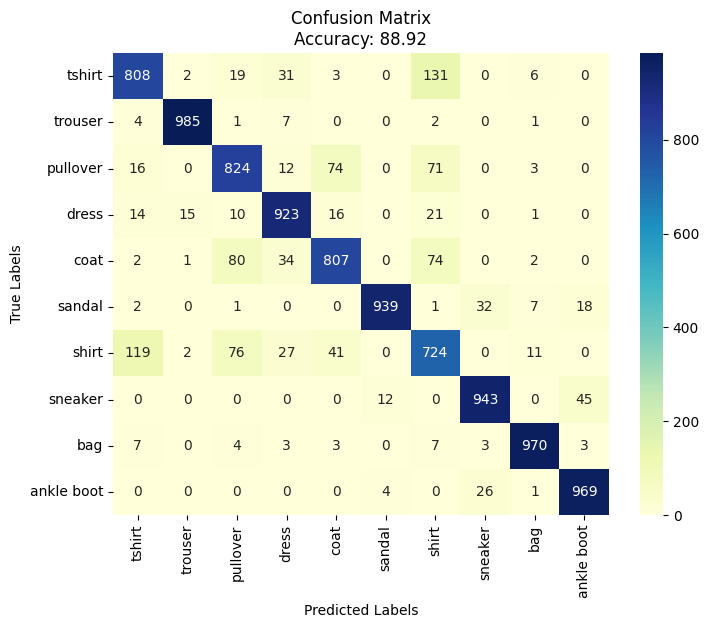

In [193]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels= classlabel, yticklabels= classlabel)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()